# Multilingual Embeddings and Vector Search

This notebook demonstrates how to:
1. Create semantic embeddings from text in multiple languages
2. Calculate similarity between different texts
3. Set up a Weaviate vector database for semantic search
4. Index documents with their embeddings
5. Perform cross-language semantic queries

We'll use `paraphrase-multilingual-MiniLM-L12-v2` to understand meaning across languages.

## Step 1: Install Required Libraries

We need:
- `sentence-transformers`: For creating multilingual embeddings
- `weaviate-client`: For vector database operations
- `matplotlib`: For visualizing similarity

In [ ]:
!pip install sentence-transformers weaviate-client matplotlib numpy pandas

## Step 2: Import Core Libraries

Setting up the main components for embeddings and vector operations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Step 3: Load the Multilingual Model

Loading a sentence transformer that understands 50+ languages and creates 384-dimensional embeddings.

In [2]:
# Load the multilingual sentence transformer
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

print(f"✅ Model loaded!")
print(f"📏 Embedding dimensions: {model.get_sentence_embedding_dimension()}")
print(f"🔤 Max sequence length: {model.max_seq_length} tokens")

✅ Model loaded!
📏 Embedding dimensions: 384
🔤 Max sequence length: 128 tokens


## Step 4: Create Example Documents

Setting up some multilingual examples to demonstrate cross-language understanding.

In [14]:
# Example documents in different languages
documents = [
    "Schubert, Franz. Symphony No. 8 in B minor",  # English
    "Schubert, Franz. Symphonie n° 8 en si mineur",  # French
    "Schubert, Franz. Sinfonie Nr. 8 in h-Moll",  # German
    "Shakespeare, William. Romeo and Juliet",  # English literature
    "Digital libraries and AI technology",  # Technology
    "Bibliotecas digitales y tecnología",  # Spanish technology
]

print(f"📚 Created {len(documents)} example documents")
for i, doc in enumerate(documents, 1):
    print(f"   {i}. {doc}")

📚 Created 6 example documents
   1. Schubert, Franz. Symphony No. 8 in B minor
   2. Schubert, Franz. Symphonie n° 8 en si mineur
   3. Schubert, Franz. Sinfonie Nr. 8 in h-Moll
   4. Shakespeare, William. Romeo and Juliet
   5. Digital libraries and AI technology
   6. Bibliotecas digitales y tecnología


## Step 5: Generate Embeddings

Converting each document into a 384-dimensional vector that captures its meaning.

In [15]:
# Generate embeddings for all documents
embeddings = model.encode(documents)

print(f"✅ Generated embeddings for {len(documents)} documents")
print(f"📊 Embedding shape: {embeddings.shape}")
print(f"🔍 First embedding (first 5 values): {embeddings[0][:5]}")

✅ Generated embeddings for 6 documents
📊 Embedding shape: (6, 384)
🔍 First embedding (first 5 values): [-0.00544422  0.48203778  0.01613121  0.22530073 -0.42488506]


## Step 6: Calculate Similarity Scores

Computing how similar each document is to every other document using cosine similarity.

In [17]:
# Calculate similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# Create labels for better display
labels = [
    "Schubert (en)",
    "Schubert (fr)", 
    "Schubert (de)",
    "Shakespeare (de)",
    "Digital libs (en)",
    "Digital libs (es)"
]

# Display as DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=labels, columns=labels)
print("🎯 Similarity Matrix:")
print(similarity_df.round(3))

🎯 Similarity Matrix:
                   Schubert (en)  Schubert (fr)  Schubert (de)  \
Schubert (en)              1.000          0.943          0.903   
Schubert (fr)              0.943          1.000          0.933   
Schubert (de)              0.903          0.933          1.000   
Shakespeare (de)           0.220          0.268          0.294   
Digital libs (en)          0.006          0.031          0.019   
Digital libs (es)          0.072          0.090          0.065   

                   Shakespeare (de)  Digital libs (en)  Digital libs (es)  
Schubert (en)                 0.220              0.006              0.072  
Schubert (fr)                 0.268              0.031              0.090  
Schubert (de)                 0.294              0.019              0.065  
Shakespeare (de)              1.000              0.012              0.096  
Digital libs (en)             0.012              1.000              0.781  
Digital libs (es)             0.096              0.781      

## Step 7: Visualize Cross-Language Similarity

Creating a heatmap to see how well the model understands meaning across languages.

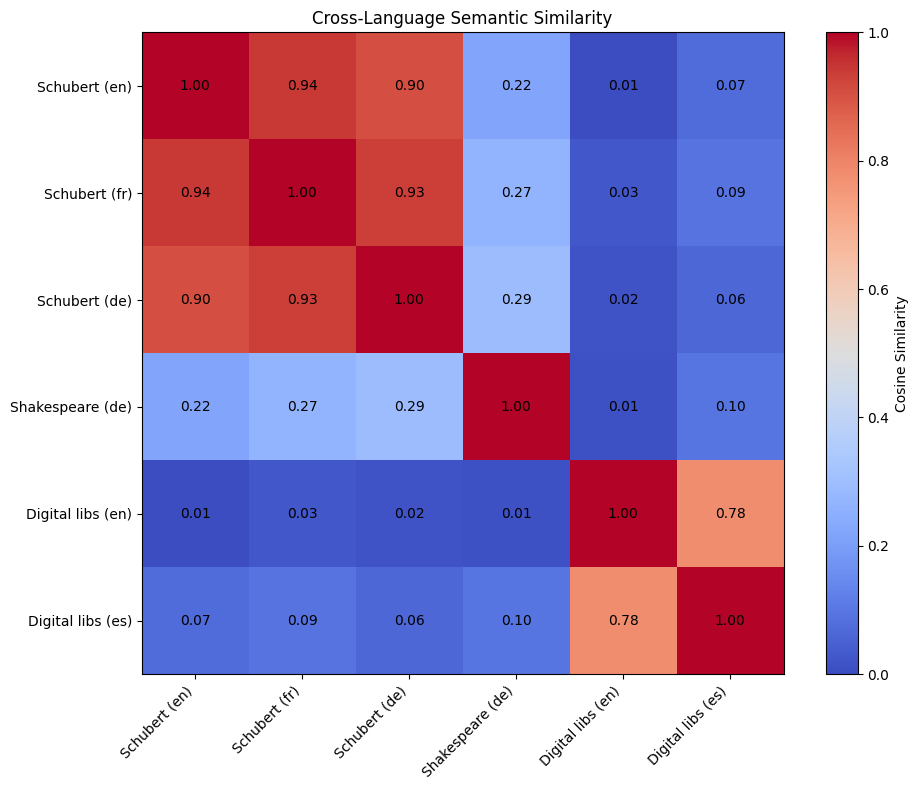

🔍 Key insights:
   Same work, different languages: 0.943 (en→fr)
   Different topics: 0.220 (Schubert→Shakespeare)


In [19]:
# Create heatmap
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar(label='Cosine Similarity')
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.yticks(range(len(labels)), labels)
plt.title('Cross-Language Semantic Similarity')

# Add similarity values as text
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f'{similarity_matrix[i, j]:.2f}', 
                ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

print("🔍 Key insights:")
print(f"   Same work, different languages: {similarity_matrix[0, 1]:.3f} (en→fr)")
print(f"   Different topics: {similarity_matrix[0, 3]:.3f} (Schubert→Shakespeare)")

## Step 8: Set Up Weaviate Connection

Connecting to a Weaviate vector database for storing and searching embeddings.

In [21]:
import weaviate
from weaviate.connect import ConnectionParams

# Connect to local Weaviate instance
try:
    connection_params = ConnectionParams.from_params(
        http_host="localhost",
        http_port=8080,
        http_secure=False,
        grpc_host="localhost",
        grpc_port=50051,
        grpc_secure=False
    )
    
    client = weaviate.WeaviateClient(connection_params=connection_params)
    client.connect()
    
    print("✅ Connected to Weaviate!")
    print(f"🟢 Server ready: {client.is_ready()}")
    
except Exception as e:
    print(f"❌ Connection failed: {e}")
    print("💡 Start Weaviate with: docker run -p 8080:8080 cr.weaviate.io/semitechnologies/weaviate:1.25.1")
    client = None

✅ Connected to Weaviate!
🟢 Server ready: True


/Users/tt434/.pyenv/versions/dfrnt/lib/python3.11/site-packages/weaviate/warnings.py:133: DeprecationWarning: Dep005: You are using weaviate-client version 4.8.0. The latest version is 4.15.4.
            Consider upgrading to the latest version. See https://weaviate.io/developers/weaviate/client-libraries/python for details.
  warnings.warn(


## Step 9: Create Document Collection

Setting up a Weaviate collection to store documents with their embeddings and metadata.

In [22]:
from weaviate.classes.config import Configure, Property, DataType, VectorDistances

if client is not None:
    try:
        # Delete existing collection if it exists
        try:
            client.collections.delete("Document")
            print("🧹 Cleaned up existing collection")
        except:
            pass
        
        # Create new collection
        collection = client.collections.create(
            name="Document",
            description="Multilingual documents with semantic embeddings",
            vector_index_config=Configure.VectorIndex.hnsw(
                distance_metric=VectorDistances.COSINE
            ),
            properties=[
                Property(name="text", data_type=DataType.TEXT),
                Property(name="language", data_type=DataType.TEXT),
                Property(name="topic", data_type=DataType.TEXT)
            ]
        )
        
        print("✅ Created Document collection")
        
    except Exception as e:
        print(f"❌ Error creating collection: {e}")
        collection = None
else:
    print("⚠️ Skipping collection creation (no Weaviate connection)")
    collection = None

🧹 Cleaned up existing collection
✅ Created Document collection


## Step 10: Index Documents with Metadata

Adding our documents to Weaviate with their embeddings and useful metadata.

In [23]:
from weaviate.util import generate_uuid5

# Document metadata
document_data = [
    {"text": documents[0], "language": "en", "topic": "music"},
    {"text": documents[1], "language": "fr", "topic": "music"},
    {"text": documents[2], "language": "de", "topic": "music"},
    {"text": documents[3], "language": "en", "topic": "literature"},
    {"text": documents[4], "language": "en", "topic": "technology"},
    {"text": documents[5], "language": "es", "topic": "technology"},
]

if client is not None and collection is not None:
    try:
        # Index documents with batch operations
        with collection.batch.fixed_size(batch_size=100) as batch:
            for i, (doc_data, embedding) in enumerate(zip(document_data, embeddings)):
                uuid = generate_uuid5(doc_data["text"])
                vector_data = embedding.tolist()
                
                batch.add_object(
                    properties=doc_data,
                    uuid=uuid,
                    vector=vector_data
                )
                
                print(f"   📄 Indexed: {doc_data['text'][:40]}... ({doc_data['language']})")
        
        print("\n✅ All documents indexed successfully!")
        
    except Exception as e:
        print(f"❌ Error indexing documents: {e}")
else:
    print("⚠️ Skipping indexing (no Weaviate connection)")

   📄 Indexed: Schubert, Franz. Symphony No. 8 in B min... (en)
   📄 Indexed: Schubert, Franz. Symphonie n° 8 en si mi... (fr)
   📄 Indexed: Schubert, Franz. Sinfonie Nr. 8 in h-Mol... (de)
   📄 Indexed: Shakespeare, William. Romeo and Juliet... (en)
   📄 Indexed: Digital libraries and AI technology... (en)
   📄 Indexed: Bibliotecas digitales y tecnología... (es)

✅ All documents indexed successfully!


## Step 11: Test Semantic Search

Performing cross-language searches to find semantically similar documents.

In [25]:
def search_documents(query_text, limit=3):
    """Search for documents similar to the query text."""
    if client is None or collection is None:
        print("⚠️ No Weaviate connection available")
        return
    
    # Generate embedding for query
    query_embedding = model.encode([query_text])[0]
    
    # Search in Weaviate
    try:
        response = collection.query.near_vector(
            near_vector=query_embedding.tolist(),
            limit=limit,
            return_metadata=['distance']
        )
        
        print(f"🔍 Search results for: '{query_text}'")
        print("=" * 50)
        
        for i, obj in enumerate(response.objects, 1):
            similarity = 1 - obj.metadata.distance
            props = obj.properties
            
            print(f"   {i}. {props['text']}")
            print(f"      🌍 {props['language']} | 📚 {props['topic']} | 🎯 {similarity:.3f}")
            print()
            
    except Exception as e:
        print(f"❌ Search error: {e}")

# Test different queries
test_queries = [
    "classical music",  # Should find Schubert works
    "música clásica",  # Spanish query for classical music
    "digital technology",  # Should find tech documents
]

for query in test_queries:
    search_documents(query)
    print("\n" + "="*60 + "\n")

🔍 Search results for: 'classical music'
   1. Schubert, Franz. Sinfonie Nr. 8 in h-Moll
      🌍 de | 📚 music | 🎯 0.699

   2. Schubert, Franz. Symphonie n° 8 en si mineur
      🌍 fr | 📚 music | 🎯 0.691

   3. Schubert, Franz. Symphony No. 8 in B minor
      🌍 en | 📚 music | 🎯 0.683



🔍 Search results for: 'música clásica'
   1. Schubert, Franz. Symphonie n° 8 en si mineur
      🌍 fr | 📚 music | 🎯 0.722

   2. Schubert, Franz. Sinfonie Nr. 8 in h-Moll
      🌍 de | 📚 music | 🎯 0.720

   3. Schubert, Franz. Symphony No. 8 in B minor
      🌍 en | 📚 music | 🎯 0.703



🔍 Search results for: 'digital technology'
   1. Bibliotecas digitales y tecnología
      🌍 es | 📚 technology | 🎯 0.751

   2. Digital libraries and AI technology
      🌍 en | 📚 technology | 🎯 0.702

   3. Shakespeare, William. Romeo and Juliet
      🌍 en | 📚 literature | 🎯 0.010





## Step 12: Search with Filters

Combining semantic similarity with metadata filters for more precise results.

In [27]:
def search_with_filter(query_text, language=None, topic=None, limit=3):
    """Search with optional language or topic filters."""
    if client is None or collection is None:
        print("⚠️ No Weaviate connection available")
        return
    
    from weaviate.classes.query import Filter
    
    query_embedding = model.encode([query_text])[0]
    
    # Build filters
    filters = None
    if language or topic:
        filter_list = []
        if language:
            filter_list.append(Filter.by_property("language").equal(language))
        if topic:
            filter_list.append(Filter.by_property("topic").equal(topic))
        
        if len(filter_list) == 1:
            filters = filter_list[0]
        else:
            filters = filter_list[0]
            for f in filter_list[1:]:
                filters = filters & f
    
    try:
        response = collection.query.near_vector(
            near_vector=query_embedding.tolist(),
            limit=limit,
            filters=filters,
            return_metadata=['distance']
        )
        
        filter_desc = []
        if language: filter_desc.append(f"language={language}")
        if topic: filter_desc.append(f"topic={topic}")
        filter_str = ", ".join(filter_desc) if filter_desc else "no filters"
        
        print(f"🔍 Filtered search: '{query_text}' ({filter_str})")
        print("=" * 50)
        
        for i, obj in enumerate(response.objects, 1):
            similarity = 1 - obj.metadata.distance
            props = obj.properties
            
            print(f"   {i}. {props['text']}")
            print(f"      🎯 Similarity: {similarity:.3f}")
            print()
            
    except Exception as e:
        print(f"❌ Search error: {e}")

# Test filtered searches
print("Testing filtered searches:")
search_with_filter("classical music", language="fr")  # French music only
print("\n" + "="*40 + "\n")
search_with_filter("technology", topic="technology")  # Technology topic only

Testing filtered searches:
🔍 Filtered search: 'classical music' (language=fr)
   1. Schubert, Franz. Symphonie n° 8 en si mineur
      🎯 Similarity: 0.691



🔍 Filtered search: 'technology' (topic=technology)
   1. Bibliotecas digitales y tecnología
      🎯 Similarity: 0.601

   2. Digital libraries and AI technology
      🎯 Similarity: 0.559



## Step 13: Test Cross-Language Understanding

Demonstrating how queries in one language can find relevant content in other languages.

In [12]:
# Cross-language test cases
cross_language_tests = [
    {"query": "symphony music", "description": "English query for music"},
    {"query": "musique symphonique", "description": "French query for symphonic music"},
    {"query": "sinfonía", "description": "Spanish query for symphony"},
    {"query": "biblioteca digital", "description": "Spanish query for digital library"},
]

print("🌍 Cross-Language Understanding Test")
print("=" * 40)

for test in cross_language_tests:
    print(f"\n📝 {test['description']}")
    search_documents(test["query"], limit=2)
    print("-" * 30)

🌍 Cross-Language Understanding Test

📝 English query for music
🔍 Search results for: 'symphony music'
   1. Franz Schubert: Symphony No. 8 in B minor
      🌍 en | 📚 music | 🎯 0.759

   2. Franz Schubert: Symphonie n° 8 en si mineur
      🌍 fr | 📚 music | 🎯 0.750

------------------------------

📝 French query for symphonic music
🔍 Search results for: 'musique symphonique'
   1. Franz Schubert: Symphonie n° 8 en si mineur
      🌍 fr | 📚 music | 🎯 0.762

   2. Franz Schubert: Sinfonie Nr. 8 in h-Moll
      🌍 de | 📚 music | 🎯 0.757

------------------------------

📝 Spanish query for symphony
🔍 Search results for: 'sinfonía'
   1. Franz Schubert: Symphony No. 8 in B minor
      🌍 en | 📚 music | 🎯 0.740

   2. Franz Schubert: Symphonie n° 8 en si mineur
      🌍 fr | 📚 music | 🎯 0.724

------------------------------

📝 Spanish query for digital library
🔍 Search results for: 'biblioteca digital'
   1. Bibliotecas digitales y tecnología
      🌍 es | 📚 technology | 🎯 0.914

   2. Digital libra

## Step 14: Clean Up

Properly closing the Weaviate connection.

In [13]:
# Clean up connection
if client is not None:
    try:
        client.close()
        print("✅ Weaviate connection closed")
    except:
        print("ℹ️ Connection cleanup completed")

print("\n🎉 Tutorial completed successfully!")
print("📚 You've learned how to:")
print("   • Generate multilingual embeddings")
print("   • Calculate semantic similarity")
print("   • Index documents in Weaviate")
print("   • Perform cross-language search")
print("   • Use filters with vector search")

✅ Weaviate connection closed

🎉 Tutorial completed successfully!
📚 You've learned how to:
   • Generate multilingual embeddings
   • Calculate semantic similarity
   • Index documents in Weaviate
   • Perform cross-language search
   • Use filters with vector search
